# Data Cleaning (for facebook summary)

## Load Data

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas_profiling
from src import tools
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

%matplotlib inline


def absoluteFilePaths(directory):
    for dirpath, _, filenames in os.walk(directory):
        for f in filenames:
            if str(f)[0] == '.':
                pass
            else:
                yield os.path.abspath(os.path.join(dirpath, f))


folder = "outputs/fb/summary/"
files = absoluteFilePaths(folder)

df_list = []
users = []
data = {}
for f in files:
    df = pd.read_csv(f)
    user = df.user.iloc[0]
    data.update({user: df})

print(data.keys())

dict_keys(['gelato-pizza-zucchini', 'eggs-macaroon-pretzel', 'fennel-tea-lime', 'mango-macaroons-macaroni', 'yams-pomelo-guava', 'yolk-carnitas-date', 'pickles-coleslaw-rhubarb', 'asparagus-croissant-kiwi', 'vanilla-bokchoy-corn', 'coleslaw-ceviche-broccoli', 'parsnip-lentils-fudge', 'waffle-hamburger-souffle', 'quince-peanut-molasses', 'croissant-watercress-pudding', 'kale-sushi-eggs', 'coconut-fudge-mandarin', 'pimiento-cranberry-samosa', 'vinegar-arrugula-biscuit', 'hummus-orzo-romaine', 'pistachio-salsa-tangelo'])


## Clean Data

In [2]:
stats = pd.DataFrame(columns=['start', 'end',
                              'average_impression_count',
                              'timelines',
                              'total_entries',
                              'missing values'
                              ])

for user, df in data.items():
    try:
        df = df.drop('Unnamed: 0', 1)
    except:
        pass

    df = df[['impressionTime', 'impressionOrder',  'id',
             'nature',  'postId', 'publicationTime', 'permaLink',
             'source', 'sourceLink', 'fblinktype',
             'texts', 'textsize', 'images',
             'semanticCount', 'semanticId', 'timeline', 'user']]

    df.index = df['impressionTime']
    df.index = pd.to_datetime(df.index)
    # end date, start date; format: YYYY-MM-DD
    df = df['2020-02-06':'2019-10-15']
    #df = df['2019-02-06':'2019-10-15']

    df.publicationTime = pd.to_datetime(df.publicationTime)
    df.impressionOrder = pd.to_numeric(df.impressionOrder, downcast='integer')

    df = df.replace("nan", np.nan)
    df = df.replace("", np.nan)
    df['fblinktype'] = df['fblinktype'].fillna('other')

    # AUTOMATE THIS
    dictionary = {
        'https://www.facebook.com/AgenziaANSA/': 'ANSA.it',
        'https://www.facebook.com/AgenziaAdnKronos/': 'Adnkronos',
        'https://www.facebook.com/corrieredellasera/': 'Corriere della Sera',
        'https://www.facebook.com/giorgiameloni.paginaufficiale/': 'Giorgia Meloni',
        'https://www.facebook.com/HuffPostItalia/': 'HuffPost Italia',
        'https://www.facebook.com/ilfoglio/': 'Il Foglio',
        'https://www.facebook.com/ilGiornale/': 'Il Giornale',
        'https://www.facebook.com/italiaviva/': 'Italia Viva',
        'https://www.facebook.com/la7fb/': 'La7',
        'https://www.facebook.com/lastampa.it/': 'La Stampa',
        'https://www.facebook.com/legasalvinipremier/': 'Lega - Salvini Premier',
        'https://www.facebook.com/liberonews/': 'Libero',
        'https://www.facebook.com/LuigiDiMaio/': 'Luigi Di Maio',
        'https://www.facebook.com/matteorenziufficiale/': 'Matteo Renzi',
        'https://www.facebook.com/Messaggero.it/': 'Il Messaggero.it',
        'https://www.facebook.com/partitodemocratico/': 'Partito Democratico',
        'https://www.facebook.com/rainews.it/': 'Rainews.it',
        'https://www.facebook.com/Repubblica/': 'la Repubblica',
        'https://www.facebook.com/salviniofficial/': 'Matteo Salvini'}

    df['source'] = df['source'].fillna(df['sourceLink'])
    df = df.replace({"source": dictionary})

    stats.loc[user] = [
        df.impressionTime.min(),
        df.impressionTime.max(),
        # max(df.impressionOrder),
        #min(df.groupby(['timeline'], sort=False)['impressionOrder'].max()),
        df.impressionOrder.mean(),
        df['timeline'].nunique(),
        df['id'].count(),
        df.isna().sum().sum()
    ]
    data[user] = df.copy()


stats

,start,end,average_impression_count,timelines,total_entries,missing values
gelato-pizza-zucchini,2019-10-22 11:01:56+00:00,2020-02-03 15:07:48+00:00,19.177669,961,18163,432
eggs-macaroon-pretzel,2019-10-21 15:53:23+00:00,2020-02-03 15:07:39+00:00,18.575860,986,19279,501
fennel-tea-lime,2019-10-21 09:34:22+00:00,2020-01-01 19:06:06+00:00,19.410764,777,14512,442
mango-macaroons-macaroni,2019-10-16 14:46:34+00:00,2020-02-05 08:15:08+00:00,19.510745,884,15217,3394
yams-pomelo-guava,2019-10-21 16:53:49+00:00,2020-01-13 19:06:09+00:00,19.244684,955,18530,585
yolk-carnitas-date,2019-10-19 10:45:02+00:00,2020-02-03 15:07:36+00:00,20.215725,990,19358,24155
pickles-coleslaw-rhubarb,2019-10-20 12:34:11+00:00,2020-02-05 10:07:40+00:00,18.742486,912,16702,517
asparagus-croissant-kiwi,2019-10-19 11:11:43+00:00,2020-02-03 15:07:25+00:00,18.732350,917,16955,400
vanilla-bokchoy-corn,2019-10-21 10:35:13+00:00,2020-01-30 10:05:45+00:00,19.732927,822,14423,18128
coleslaw-ceviche-broccoli,2019-10-20 11:08:47+00:00,2020-02-03 07:20:07+00:00,19.142758,947,17253,23709


In [3]:
#data['parsnip-lentils-fudge'].drop('impressionTime',1).profile_report(check_correlation_cramers=False,
#                  check_correlation_pearson=False,
#                  cardinality_threshold=len(df)*0.9,
#                  style={'full_width':True}
#                                          )

In [4]:
"""import json

def string_to_dict(dict_string):
    # Convert to proper json format
    dict_string = dict_string.replace("'", '"').replace("\\'","").replace("\\n","").replace("\"\"","\"").replace("\"s", " s")
    #print(dict_string)
    return json.loads(dict_string)


df.images_dict = df.images.apply(string_to_dict)

df2 = df.images_dict.apply(pd.Series)

#df2.captions = df2.captions.replace("]", "").replace("[Image may contain: ", "")
df2.captions = df2.captions.astype(str)

df2.captions = df2.captions.replace('\[', '', regex=True).replace('\]', '', regex=True).replace('\\', '', regex=True)
df2.captions = df2.captions.replace('Image may contain: ','',regex=True)
df2.captions = df2.captions.replace(' and ',', ',regex=True)

df2.columns = ['image.count', 'image.captions']

df = pd.concat([df.drop(['images'], axis=1), df2], axis=1)
"""

'import json\n\ndef string_to_dict(dict_string):\n    # Convert to proper json format\n    dict_string = dict_string.replace("\'", \'"\').replace("\\\'","").replace("\\n","").replace("""",""").replace(""s", " s")\n    #print(dict_string)\n    return json.loads(dict_string)\n\n\ndf.images_dict = df.images.apply(string_to_dict)\n\ndf2 = df.images_dict.apply(pd.Series)\n\n#df2.captions = df2.captions.replace("]", "").replace("[Image may contain: ", "")\ndf2.captions = df2.captions.astype(str)\n\ndf2.captions = df2.captions.replace(\'\\[\', \'\', regex=True).replace(\'\\]\', \'\', regex=True).replace(\'\\\', \'\', regex=True)\ndf2.captions = df2.captions.replace(\'Image may contain: \',\'\',regex=True)\ndf2.captions = df2.captions.replace(\' and \',\', \',regex=True)\n\ndf2.columns = [\'image.count\', \'image.captions\']\n\ndf = pd.concat([df.drop([\'images\'], axis=1), df2], axis=1)\n'

## Check how many posts have been collected per day

In [5]:
df = pd.concat(data.values())
def dailyPostCountGraph(df, user):
    data = tools.setDatetimeIndexFloor(tools.setDatetimeIndex(df), what="1D")
    data = data.groupby(data.index).postId.count()
    data = data.to_frame()

    fig, ax = plt.subplots(figsize=(15, 7))

    # set ticks every week
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    ax.set_title('Number of posts collected per day for user: '+user)
    ax.bar(data.index, data.postId)
    return(fig, ax)



#fig, ax = (dailyPostCountGraph(df, user))

@interact
def show_plot(user=df['user'].unique()):
    return dailyPostCountGraph(data[user], user)

interactive(children=(Dropdown(description='user', options=('gelato-pizza-zucchini', 'eggs-macaroon-pretzel', …

In [6]:

def dailyPostCountGraph(df, user, column):
    data = tools.setDatetimeIndexFloor(tools.setDatetimeIndex(df), what="1D")
    data = data.groupby(data.index)[column].count()
    data = data.to_frame()

    fig, ax = plt.subplots(figsize=(15, 7))

    # set ticks every week
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    ax.set_title('Number of entries in col '+column+' collected per day for: '+user)
    ax.bar(data.index, data[column])
    return(fig, ax)



#fig, ax = (dailyPostCountGraph(df, user))

@interact
def show_plot(user=df['user'].unique(), column=df.columns):
    return dailyPostCountGraph(data[user], user, column)

interactive(children=(Dropdown(description='user', options=('gelato-pizza-zucchini', 'eggs-macaroon-pretzel', …

In [7]:


def clean(df):
    #df = df[pd.notnull(df['postId'])]
    df = df[pd.notnull(df['source'])]
    df = df[['impressionOrder', 'id', 'nature',
            'source', 'fblinktype',
             'texts', 'textsize',
             'timeline', 'user']]
    return df


cleaned_df = clean(df)

display(cleaned_df)

,impressionOrder,id,nature,source,fblinktype,texts,textsize,timeline,user
impressionTime,,,,,,,,,
2020-02-03 15:07:48+00:00,47,4774f551186fefaa3ae6e6473cbd29e5377498be,organic,Partito Democratico,photo,"[""È sempre più chiaro che l’Italia ha una prio...",281,cranberry-kumquat-kebab,gelato-pizza-zucchini
2020-02-03 15:07:47+00:00,46,e9d3845b5bf9ccdf5a1633eb76756f10656d1519,sponsored,Rabobank,other,['Zien waar je geld naartoe gaat? Onze app cat...,109,cranberry-kumquat-kebab,gelato-pizza-zucchini
2020-02-03 15:07:46+00:00,43,b8ff0783953c0374a0f77c1f30826ca44382aa62,organic,la Repubblica,posts,['Miss Italia 2015 ripercorre il suo periodo b...,320,cranberry-kumquat-kebab,gelato-pizza-zucchini
2020-02-03 15:07:46+00:00,44,26cfafb1f2dc7bf3080061a6e5b6a3b331a8fe98,organic,Corriere della Sera,posts,['Ha avuto risultati promettenti su una pazien...,406,cranberry-kumquat-kebab,gelato-pizza-zucchini
2020-02-03 15:07:46+00:00,45,66c94596e208fc5a6800227f9be2fa5d42989e93,organic,La Stampa,posts,['Monica De Re ha reso creativa la passione pe...,391,cranberry-kumquat-kebab,gelato-pizza-zucchini
...,...,...,...,...,...,...,...,...,...
2019-10-22 16:11:02+00:00,3,f4d306876e71516aa3f4ad04c40283696d6ca354,organic,Luigi Di Maio,posts,"['++IMPORTANTE++', ' Ho due BUONE NOTIZIE per ...",1410,cheese-apple-cucumber,pistachio-salsa-tangelo
2019-10-22 16:10:58+00:00,1,8cdb65f1b529a4663cc51c0b307c4d8b6873ada1,organic,Matteo Renzi,photo,[''],0,cheese-apple-cucumber,pistachio-salsa-tangelo
2019-10-22 14:39:24+00:00,1,7ebf47e2039187af1d4ae7bd76283067f037bb94,organic,Goodful,videos,['Making this for brunch this weekend 💯👌 Full ...,105,jelly-pasta-coffee,pistachio-salsa-tangelo


In [8]:
cleaned_df.profile_report(check_correlation_cramers=False,
                  check_correlation_pearson=False,
                  cardinality_threshold=len(df)*0.9,
                  style={'full_width':True})

In [12]:
#df = pd.concat(data.values())
def datesPostCountGraph(df, user):
    data = tools.setDatetimeIndexFloor(df, what="1D")
    data = data.groupby(data.index).id.count()
    data = data.to_frame()

    fig, ax = plt.subplots(figsize=(15, 7))

    # set ticks every week
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    ax.set_title('Number of posts collected per day for user: '+user)
    ax.bar(data.index, data.id)
    return(fig, ax)



#fig, ax = (dailyPostCountGraph(df, user))

@interact
def show_plot(user=cleaned_df['user'].unique(),start_date="2019-10-12",end_date="2020-01-03"):
    mask = ( cleaned_df['user'] == user )
    return datesPostCountGraph(cleaned_df[mask].loc[end_date:start_date], user)

interactive(children=(Dropdown(description='user', options=('gelato-pizza-zucchini', 'eggs-macaroon-pretzel', …

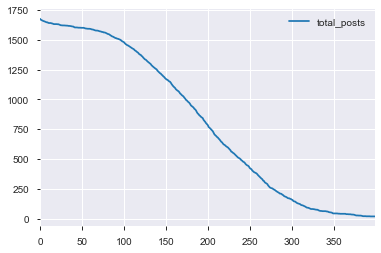

In [10]:
import altair as alt
alt.renderers.enable('notebook')

# who has more missing days?

def dailyPostCount(df):
    data = tools.setDatetimeIndexFloor(df, what="1D")
    data = data.groupby([data.index, data.user]).id.count()
    data = data.to_frame()
    return data


count = dailyPostCount(cleaned_df)


len(count[(count['id']>60)])

where_to_cut = pd.DataFrame(columns=['total_posts'])
for i in range(0,400):
    l = len(count[(count['id']>i)])
    
    where_to_cut.loc[i] = [
        
        l
    ]
where_to_cut.plot()

In [13]:
stats = pd.DataFrame(columns=['start', 'end',
                              'average_impression_count',
                              'timelines',
                              'total_entries',
                              'missing values'
                              ])

def getStats(df):
    for user in df.user.unique():
        df = df[( df['user'] == user )]
        print(df.user.unique())
        stats.loc[user] = [
                df.index.min(),
                df.index.max(),
                # max(df.impressionOrder),
                #min(df.groupby(['timeline'], sort=False)['impressionOrder'].max()),
                df.impressionOrder.mean(),
                df['timeline'].nunique(),
                df['id'].count(),
                df.isna().sum().sum()
            ]
        return stats

stats = getStats(cleaned_df)

stats

['gelato-pizza-zucchini']


,start,end,average_impression_count,timelines,total_entries,missing values
gelato-pizza-zucchini,2019-10-22 00:00:00+00:00,2020-02-03 00:00:00+00:00,19.177669,961,18163,0


In [ ]:
polarized = ['kale-sushi-eggs',
             'pickles-coleslaw-rhubarb',
             'parsnip-lentils-fudge',
             'yams-pomelo-guava',
             'eggs-macaroon-pretzel',
             'croissant-watercress-pudding',
             'yolk-carnitas-date',
             'asparagus-croissant-kiwi',
             'coleslaw-ceviche-broccoli'
             'coconut-fudge-mandarin'
             ]